In [1]:
import pandas as pd
import numpy as np
import re, string
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer#for word embedding
import seaborn as sns
import matplotlib.pyplot as plt

theCsv = pd.read_csv("person1Body_default_RvB.csv")



#theCsvTrain = theCsv[theCsv["isTraining"]== 1]
#theCsvTest = theCsv[theCsv["isTraining"]== 0]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dc17540/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/dc17540/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
theCsv = pd.read_csv("person1Body_default_RvB.csv")
                     
theCsv = theCsv[2100:2100+1290]

len(theCsv)

1290

In [3]:
theS =np.concatenate((np.full(16*30, 1),np.full(11*30,3),np.full(1*30, 4),np.full(11*30,2),np.full(2*30, 3),np.full(2*30,4)),axis=None)
len(theS)
theCsv["output"] = theS

from sklearn.model_selection import train_test_split

X= theCsv.loc[:, theCsv.columns != "output"]
y= theCsv["output"]
  

    
# using the train test split function
#X_train, X_test,
#y_train, y_test 

theWoo = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

X_train = theWoo[0]
X_test = theWoo[1]
y_train = theWoo[2]
y_test = theWoo[3]


1290


/home/dc17540/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, "Dancer 1's Movement")

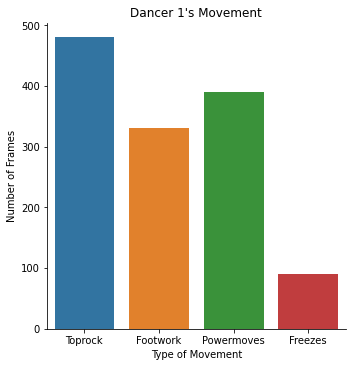

In [10]:
theCount = [0,0,0,0]

for ele in theS.tolist():
    if(ele == 1):
        theCount[0] += 1
    elif(ele == 2):
        theCount[1] += 1
    elif(ele == 3):
        theCount[2] += 1
    else:
        theCount[3] += 1

print(sum(theCount))
dfs = pd.DataFrame(data={'Type of Movement': ['Toprock','Footwork',"Powermoves","Freezes"], 'Number of Frames': theCount})
sns.factorplot(x='Type of Movement', y='Number of Frames', data=dfs, kind='bar')
plt.title("Dancer 1's Movement")

In [5]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train,y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9659442724458205
Confusion Matrix: [[118   0   0   0]
 [  0  78   0   2]
 [  1   2  99   2]
 [  0   3   1  17]]
